# __Time series forecasting__

## References

[Hyndman and Athanasopoulos, Forecasting: Principles and Practice](https://otexts.com/fpp2/)

[Stationarity in time series analysis](https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322)

[Trend, Seasonality, Moving Average, Auto Regressive Model : My Journey to Time Series Data with Interactive Code](https://towardsdatascience.com/trend-seasonality-moving-average-auto-regressive-model-my-journey-to-time-series-data-with-edc4c0c8284b)

[4 Common Machine Learning Data Transforms for Time Series Forecasting](https://machinelearningmastery.com/machine-learning-data-transforms-for-time-series-forecasting/)

## __What is a time series?__

Time series data is observed sequentially over time, with each observation associated to a timestamp.  Most commonly these timestamps are evenly spaced.

There is connection (and hopefully correlation!) between samples, and that the order matters.

A good time series forecast will capture genuine patterns & relationships in data, without repeating past events that don't appear again.
- the aim is to estimate how the sequence of observations will continue into the future

A good forecast will be able to identify components of the time series that change, and will often assume them to be changing in their forecasts.

## __Applications__

Given the temporal dimension of our universe, there are numerous applications of time series forecasting. 

A few examples are given below:

- finance - stock prices
- weather & climate - rainfall
- accounting - annual sales, monthly costs
- business - customer churn
- energy - demand, generation, price

The applicability of time series forecasting depends on how predictable the time series is

## __Is my time series predictable?__

The predictability of future values in that time series depends on
- how well we understand the variables that contribute
- availability of data
- if the forecast itself affects future values (think of a forecast of economic indicators such as GDP)

A key question in time series is how predictable the time series is, and if the patterns we see are anything more than random noise!

## __Characteristics and components of a time series__

The figure below shows the quarterly Australian beer production from 1992 to the second quarter of 2010. The blue lines show forecasting for two years, the dark shaded regions an 80 %, and the light shaded regions an 95 % confidence interval.

Take a look at the time series plot below.  What words would you use to describe it?

<img src="../images/australian_beer_production.png" width=700> <br/>
__Australian quarterly beer production with 2 years of forecasts.__ ([Hyndman and Athanasopoulos, Forecasting: Principles and Practice](https://otexts.com/fpp2/))

In time series we use the following to characterize a time series:

- stationarity - how the statistics of a process change over time
- trend - a non-repeating change (inflation, population growth)
- seasonality - a repeating change (weather seasons)
- noise - non systematic, unpredictable

Question to class - is a time series with a trend stationary or non-stationary?

## __Exogeneous variables__

Imagine we are forecasting sales at a store
- it is likely that knowing the sales on the previous day is useful
- it is also likely that knowing other variables such as which store and weather are useful

The last point is an example of using exogenous predictors.  

## __Specifying models__

For the example of hourly electricity demand $ED$, an exogeneous model would look like the following:

$ED = f(current\ temperature, strength\ of\ economy, population, time\ of\ day, day\ of\ week, error)$

A model using only previous values of the target looks like:

$ED_{t+1} = f(ED_t, ED_{t-1}, ED_{t-2}, ED_{t-3}, ... ,error)$

It is also possible to combine these into a mixed model:

$ED_{t+1} = f(ED_t, current\ temperature, time\ of\ day, day\ of\ week, error)$

## __What data do I have at test time?__

When using any features (exogeneous or not) it is crucial that this data is always available when you make the prediction!

For example, you may not be able to use the previous days sales if the data is only available a week later.

## __Some simple forecasting methods__

The simplest approaches to time series are especially important to understand as a **simple approach which should always be used as a baseline**.

Quite often a simple approach will outperform a more complex approach.

Here, we will look at some of the simplest forecasting methods:
- __Drift:__ draw a line between the first and the last value and extrapolate.
- __Mean:__ uses an unconditional sample mean as a forecast.
- __Naive:__ takes the target value of the last timestamp.
- __Seasonal naive:__ takes the target value of the same time point of the __LAST__ season and uses it as a forecast value.

In [ ]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='../images/drift.png' width='600'></td><td><img src='../images/seasonal_naive.png'width='600'></td></tr></table>"))

[Hyndman and Athanasopoulos, Forecasting: Principles and Practice](https://otexts.com/fpp2/)

## __Basic time series functionality methods in Python__

Below we will look at the objects commonly used in Python for dealing with dates & times.

In [1]:
import pandas as pd
import numpy as np

### __Dates and Times__

### ISO 8601

An international standard for datetimes - [Wikipedia](https://en.wikipedia.org/wiki/ISO_8601).  

A noteable feature of the standard is the use of `T` to separate the date & time

The below are all the same time, in UTC (Z = Zulu time = UTC = GMT).

```
2019-11-28T09:18:53+00:00

2019-11-28T09:18:53Z

20191128T091853Z
```

We can also represent the same moment in time in another time zone (say Central European Time, which is one hour ahead of UTC):

```
2019-11-28T10:18:53+01:00
```

*Standard times* are not affected by daylight savings - be thankful if your data is stamped in or you can work in a standard time.  

Working in local times is the worst case scenario for a programmer

#### __Timestamps__

In [ ]:
# create a date range
rng = pd.date_range('2016 Jul 1', periods = 10, freq = 'D')
rng

In [ ]:
pd.Timestamp('2016-07-10')

In [ ]:
# you can add more details
pd.Timestamp('2016-07-10 10')

In [ ]:
# and more
pd.Timestamp('2016-07-10 10:15')

In [ ]:
# creation of timestamp object variable
t = pd.Timestamp('2016-07-10 10:15')

#### __Time spans__

A period of time, with an associated frequency

In [ ]:
pd.Period('2016-01')

In [ ]:
pd.Period('2016-01-01')

In [ ]:
pd.Period('2016-01-01 10')

In [ ]:
pd.Period('2016-01-01 10:10')

In [ ]:
t = pd.Period('2016-01-01 10:10:10', freq='h')

In [ ]:
t.freq

#### __Time offsets__

In [ ]:
pd.Timedelta('1 day')

In [ ]:
pd.Period('2016-01-01 10:10') + pd.Timedelta('1 day')

In [ ]:
pd.Timestamp('2016-01-01 10:10') + pd.Timedelta('1 day')

In [ ]:
pd.Timestamp('2016-01-01 10:10') + pd.Timedelta('15 ns')

#### __Frequency settings__

In [ ]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html under 'DateOffset'
# only business days:
pd.period_range('2016-01-01 10:10', freq = 'B', periods = 10)

In [ ]:
# possible to combine frequencies. What if you want to advance by 25 hours each day. What are the 2 ways to do it?
p1 = pd.period_range('2016-01-01 10:10', freq = '25H', periods = 10)

In [ ]:
p2 = pd.period_range('2016-01-01 10:10', freq = '1D1H', periods = 10)

In [ ]:
p1

In [ ]:
p2

In [ ]:
# timestamped data can be convereted to period indices with to_period and vice versa with to_timestamp
ts = pd.Series(range(10), pd.date_range('07-10-16 8:00', periods = 10, freq = 'H'))
ts

In [ ]:
ts_period = ts.to_period()
ts_period

In [ ]:
ts_period['2016-07-10 08:30':'2016-07-10 11:45'] # we have the concept of overlap with time periods

In [ ]:
ts['2016-07-10 08:30':'2016-07-10 11:45'] # we have the concept of include with timestamps

### __Time zone handling__

A frustrating challenge for all programmers:

![](../images/tz.jpg)


In [ ]:
rng = pd.date_range('3/6/2012 00:00', periods=15, freq='D')
rng.tz

In [ ]:
rng_tz = pd.date_range('3/6/2012 00:00', periods=15, freq='D', tz='Europe/London')
rng_tz.tz

In [ ]:
from pytz import common_timezones, all_timezones
print(len(common_timezones))
print(len(all_timezones))
print(set(all_timezones) - set(common_timezones))

In [ ]:
#localisation of naive timestamp
t_naive = pd.Timestamp('2016-07-10 08:50')
t_naive

In [ ]:
t = t_naive.tz_localize(tz = 'US/Central')
t

In [ ]:
t.tz_convert('Asia/Tokyo')

In [ ]:
#handling of daylight saving
rng = pd.date_range('2016-03-10', periods=10, tz='US/Central')
ts = pd.Series(range(10), index=rng)
ts

In [ ]:
rng = pd.date_range('2016-03-10', periods=10, tz='utc')
ts = pd.Series(range(10), index=rng)
ts

In [ ]:
ts.tz_convert('US/Central')

In [ ]:
#what happens if one hour does not exist due to daytime saving time?
pd.Timestamp('2016-03-13 02:00:00', tz = 'US/Central')

In [ ]:
sp = pd.date_range(start='2016-03-13 01', periods=3, freq='H', tz='US/Central')
sp

In [ ]:
# what if we enter the winter period wp?
wp = pd.date_range(start='2019-10-27 01', periods=5, freq='H', tz='CET')
wp

### __Datetimes in DataFrames__

In [ ]:
#Parsing datetime columns
df = pd.DataFrame({'year': [2015, 2016],'month': [2, 3],'day': [4, 5],'hour': [2, 3]})
df

In [ ]:
pd.to_datetime(df)

In [ ]:
pd.to_datetime(df[['year', 'month', 'day']])

In [ ]:
#truncate convenience function
ts = pd.Series(range(10), index=pd.date_range('7/31/2015', freq='M', periods=10))
ts

In [ ]:
ts.truncate(before='2015-10-31', after='2015-12-31')

In [ ]:
#truncate by indexing
ts[[0, 2, 6]].index

In [ ]:
ts.ix[0:10:2].index

### __Resampling__

In [ ]:
rng = pd.date_range('1/1/2011', periods=72, freq='H')
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [ ]:
ts

In [ ]:
converted = ts.asfreq('45Min', method='pad')

In [ ]:
converted1 = ts.asfreq('45Min', method='backfill')

In [ ]:
converted

In [ ]:
converted1

In [ ]:
converted = ts.asfreq('90Min', method = 'bfill')

In [ ]:
ts.resample('D').sum()

### __Moving window functions__

In [ ]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [ ]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

In [ ]:
# pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
# r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [ ]:
#Plotting rolling averages per columns
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [ ]:
df.head()

In [ ]:
df = df.cumsum()
df.head()

In [ ]:
df.rolling(window = 50).sum().plot(subplots=True)

In [ ]:
#apply a custom fucntion to your data using the .apply() method
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean()) # x refers to any elemtn within the defined window of 10

In [ ]:
#yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

## __Data transformations__

Commonly in data science we apply transformations to data (i.e. standardization or normalization).  All of these transformations require an inverse.

In time series transformations are often performed to remove components such as trend or seasonality

Below we look at two common time series transformations.

#### __Log transformation__

A subset of the more general power transformations (square root, cube root, log, etc).  The power transforms attempt to make data more Gaussian.  In time series the effect can often be removing a change in variance over time.

The log transform is common in finance, as it transforms exponential accumulation of returns to linear

A log transform will make a process more stationary, by transforming multiplicative trends into linear trends

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#the airline passengers dataset is a famous one to demonstrate time series forecasts
#we will see it at other occasions throughout this course
airline_passengers = pd.read_csv('../data/airline_passengers.csv')

In [ ]:
plt.style.use('ggplot')
airline_passengers.plot(color='blue');

- the trend of this dataset is an exponential increase
- the periodic amplitude also increases over time

In [ ]:
airline_passengers_log = airline_passengers['Thousands of Passengers'].apply(lambda x: np.log10(x))

In [ ]:
plt.style.use('ggplot')
airline_passengers_log.plot(color='blue');

After the log transform
- the trend became almost linear
- the periodic amplitude remains constant

#### __Difference transform__

Also known as differencing.  There are various types of differencing:
- first order - subtracting by the previous value (t-1).  This will remove trend
- seasonal differencing - subtracting by the previous value the season before, such as yesterday, last week or last year

First order differencing can be repeated to remove second order trends.

Below we apply a first order difference to our passengers dataset:

In [ ]:
diff = airline_passengers.loc[:, 'Thousands of Passengers'].diff(1)

In [ ]:
diff.plot(color='blue')

The differencing transform has removed our linear growth trend

## __Exercise__

- load the `co2_mm_mlo.csv` dataset
- create a time stamp column
- is the time series stationary?
- does the time series have a trend?
- does the time series implement seasonality?

Based on your visual examination, apply either / or the transforms we discussed above (log / differencing)

Finally, implement a naive & seasonal naive forecast for this dataset.

### __#1__

In [2]:
data = pd.read_csv('../data/co2_mm_mlo.csv')

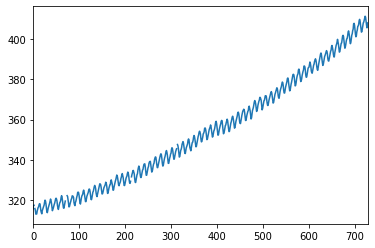

In [5]:
data.loc[:, 'average'].plot();

In [6]:
data.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


### __#2__

In [7]:
import datetime as dt

In [8]:
lst = []

for i in data.decimal_date:
    time = i
    year = dt.date(int(time), 1, 1)
    day = pd.Timedelta(days=(time % 1 * 365))
    datetime = str(year + day)
    lst.append(datetime)
    
data['datetime'] = pd.to_datetime(lst)

In [9]:
data.head()

,year,month,decimal_date,average,interpolated,datetime
0,1958,3,1958.208,315.71,315.71,1958-03-17
1,1958,4,1958.292,317.45,317.45,1958-04-17
2,1958,5,1958.375,317.50,317.50,1958-05-17
3,1958,6,1958.458,NaN,317.10,1958-06-17
4,1958,7,1958.542,315.86,315.86,1958-07-17


In [10]:
data.set_index('datetime', drop=True, inplace=True)

In [11]:
data.drop(columns=['year', 'month', 'decimal_date'], inplace=True)

In [12]:
data.head(100)

,average,interpolated
datetime,,
1958-03-17,315.71,315.71
1958-04-17,317.45,317.45
1958-05-17,317.50,317.50
1958-06-17,NaN,317.10
1958-07-17,315.86,315.86
...,...,...
1966-02-15,321.59,321.59
1966-03-17,322.39,322.39
1966-04-17,323.87,323.87


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 729 entries, 1958-03-17 to 2018-11-16
Data columns (total 2 columns):
average         722 non-null float64
interpolated    729 non-null float64
dtypes: float64(2)
memory usage: 17.1 KB


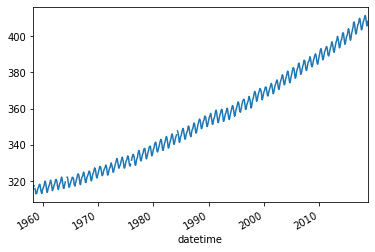

In [14]:
data.loc[:, 'average'].plot()

### __#3__

No, as visual inspection suggests the existence of a trend and seasonality. Hence, unconditional mean != const. and variance != const, arguing against a stationary dataset.

### __#4__

Yes

### __#5__

Yes

### __#6__

find the respective commands above in the notebook

### __#7a__

In [15]:
#here, we set the desired time range for our naive forecast
index = pd.date_range(start=data.index.max() + pd.Timedelta(days=1), freq='M', periods=50)

In [16]:
#let's create our naive values
values = []
for i in index:
    x = data.average[-1]
    values.append(x)

In [17]:
#now we append our new index and naive forecast list to the existing dataframe; note that whichever columns we do not fill explicitly, they will be filled with nan values
df_append = pd.DataFrame(data={'average':values}, index=index)
data_naive = data.append(df_append, sort=True)

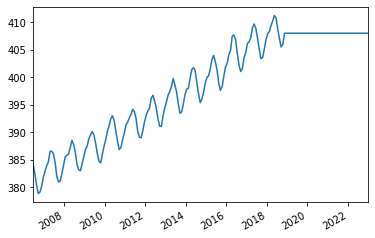

In [18]:
#for the sake of visualisation, we plot only the lastt 200 data points
data_naive.iloc[-200:,:].loc[:, 'average'].plot()

### __#7b__

In [19]:
#let's do the seasonal naice forecast for a period of two years
#this is the only way I found to circumvent leapyear issues as Timedelta appears limited beyond timescales of one year

index = []
for i in data.index[-24:]:
    i = i.replace(i.year + 2)
    index.append(i)
    
index[:5]

[Timestamp('2018-12-15 00:00:00'),
 Timestamp('2019-01-16 00:00:00'),
 Timestamp('2019-02-15 00:00:00'),
 Timestamp('2019-03-17 00:00:00'),
 Timestamp('2019-04-17 00:00:00')]

In [20]:
values = []
for i in data.iloc[-24:, :].average:
    x = i
    values.append(x)

In [21]:
df_append = pd.DataFrame({'average':values}, index=index)
df_seasonal_naive = data.append(df_append, sort=True)

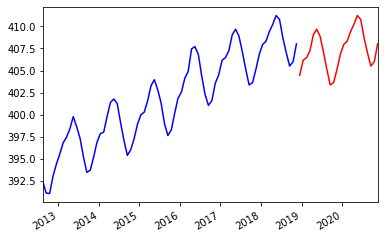

In [22]:
df_seasonal_naive.iloc[-100:-24].loc[:, 'average'].plot(color='blue')
df_seasonal_naive.iloc[-24:].loc[:, 'average'].plot(color='red')

__Can you guess why the seasonal forecast features this abrupt shift? Note that besides seasonality our dataset bears a trend as well.__